# MNIST DATASET CNN

In [1]:
import numpy as np
import torch
import torchvision
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import  matplotlib.pyplot as plt

In [2]:
torchvision.datasets.MNIST

torchvision.datasets.mnist.MNIST

In [3]:
train_data= datasets.MNIST(
    root="data", #where to download the data
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data= datasets.MNIST(
    root="data", #where to download the data
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [4]:
len(train_data)

60000

In [5]:
len(test_data)

10000

In [6]:
image,label=train_data[0]
# image,label

In [7]:
class_names= train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [9]:
len(train_data.targets)

60000

In [10]:
image.shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28])


Text(0.5, 1.0, '5 - five')

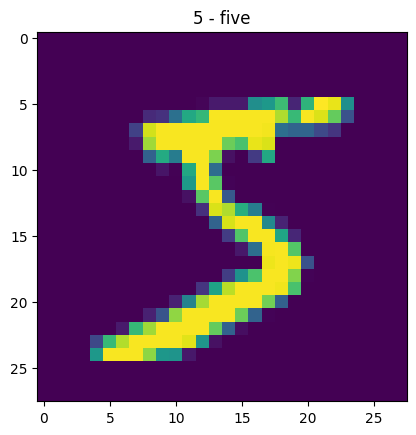

In [11]:
image,lable=train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

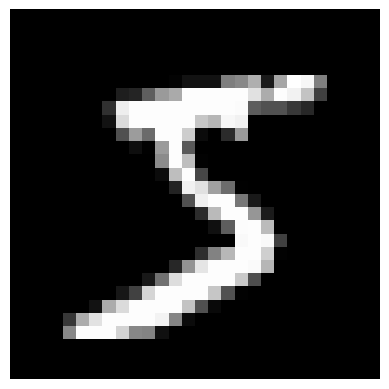

In [12]:
plt.imshow(image.squeeze(),cmap="gray")
plt.axis(False)

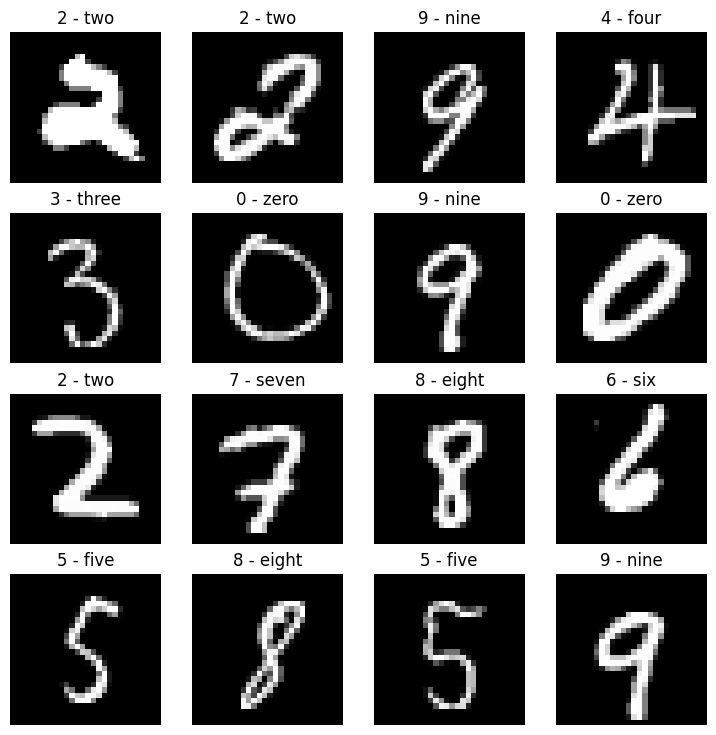

In [13]:
torch.rand(42)

fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1, rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,lable=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[lable])
    plt.axis(False)

In [14]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
#turn datasets into batches
train_dataloader=DataLoader(dataset=train_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [15]:
len(train_dataloader), len(test_dataloader)
#1875 is one batch , so 1875*32 is 60000 (length of train data)

(1875, 313)

In [16]:
#whats happening in training datloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape
#batchsize, height,width,color channels


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

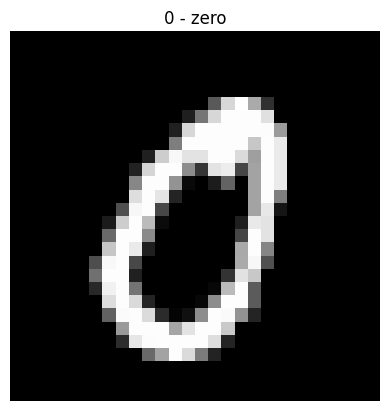

In [17]:
#show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch), size=[1]).item()
img,label= train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [18]:
#creat a flatten layer
flatten_model=nn.Flatten()
#get a single sample
x= train_features_batch[0]
x.shape
#flatten the sample
output=flatten_model(x) #perform what happened
print('before flattening:')
print(x.shape)#color channels, height, width
print('after flattening:')
print(output.shape)#color channels, height*width

before flattening:
torch.Size([1, 28, 28])
after flattening:
torch.Size([1, 784])


In [19]:
class MNISTModelTinyVGG(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    
    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        #block1: conv,relu- conv,relu,maxpool
        #block2: conv,relu- conv,relu,maxpool
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features= output_shape)
        )
    
    #forward method
    
    def forward(self,x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x= self.conv_block_2(x)
        #print(x.shape)
        x= self.classifier(x)
        return x

In [20]:
class_names= train_data.classes

In [21]:
torch.manual_seed(42)
mnist_model= MNISTModelTinyVGG(input_shape=1,
                           hidden_units=10,
                           output_shape= len(class_names))
mnist_model

MNISTModelTinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [22]:
#nn. Conv2d
torch.manual_seed(42)
#creating a batch of images
images = torch.randn(size=(32,3,64,64))
test_image= images[0]
print('image shape',images.shape)
print('test image shape',test_image.shape)
# print(test_image)

image shape torch.Size([32, 3, 64, 64])
test image shape torch.Size([3, 64, 64])


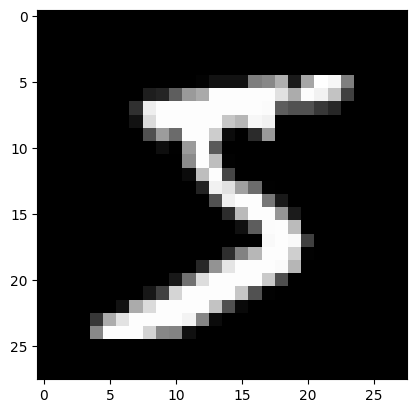

In [23]:
plt.imshow(image.squeeze(), cmap="gray")

In [24]:
import requests
from pathlib import Path
#download
if Path("helper_functions.py").is_file():
    print('exists, skipping download....')
else:
    print('downloading..')
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py','wb') as f:
        f.write(request.content)

exists, skipping download....


In [25]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=mnist_model.parameters(),
                          lr=0.1)

# training and testing loops

In [26]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
    train_loss, train_acc = 0,0
    #put model in training mode
    model.train()

    #training

    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
        #1 forward pass
        y_pred= model(X)
        
        loss= loss_fn(y_pred,y)
        
        train_loss += loss #accumulate train loss
        train_acc +=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        #loss backward
        loss.backward()
        
        #optimizer step
        optimizer.step()
        
        #print out whats happening
        if batch %400==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
            
    #divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    #print out whats happening
    print(f"Train loss: {train_loss:0.5f} | Train_acc: {train_acc: 0.2f}%")

test_loss=0
def testing_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            #forward pass
            test_pred= model(X)
            
            #calculate the loss
            test_loss +=loss_fn(test_pred,y)
            
            #calculate the accuracy
            test_acc +=accuracy_fn(y_true=y, 
                                   y_pred=test_pred.argmax(dim=1))
            
        #calculate the test loss average per batch
        test_loss /= len(data_loader)
        
        #calculate the test acc average per batch
        test_acc /= len(data_loader)
    
    #print out whats happening
    print(f"Test_loss: {test_loss:0.5f} | Test_acc: {test_loss: 0.2f}, Test acc: {test_acc: 4f}")

    

In [27]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float):
    """Prints difference between start and end time """
    total_time= end-start
    return ("train time",total_time)

In [28]:
torch.manual_seed(42)
from tqdm.auto import tqdm

from timeit import default_timer as timer
train_time_start_mnist_model = timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(model=mnist_model,
               data_loader= train_dataloader,
               loss_fn= loss_fn,
               optimizer= optimizer,
               accuracy_fn= accuracy_fn)
    
    testing_step(model=mnist_model,
              data_loader= test_dataloader,
              loss_fn= loss_fn,
              accuracy_fn= accuracy_fn
              )
train_time_end_mnist_model= timer()
total_train_time_mnist_model= print_train_time(start=train_time_start_mnist_model,
                                           end=train_time_end_mnist_model)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.33442 | Train_acc:  88.81%
Test_loss: 0.07836 | Test_acc:  0.08, Test acc:  97.603834
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.08719 | Train_acc:  97.26%
Test_loss: 0.07802 | Test_acc:  0.08, Test acc:  97.563898
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.06807 | Train_acc:  97.92%
Test_loss: 0.05946 | Test_acc:  0.06, Test acc:  98.063099


In [29]:
# torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containng the results of model predicting on data Loader"""
    loss, acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            #make predictions
            y_pred= model(X)
            
            
            #accumulate the loss and accuracy balues per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred= y_pred.argmax(dim=1))
            
        #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc}


In [30]:
# get results
mnist_model_results =  eval_model( model= mnist_model,
                              data_loader= test_dataloader,
                              loss_fn= loss_fn,
                              accuracy_fn= accuracy_fn)
mnist_model_results

{'model_name': 'MNISTModelTinyVGG',
 'model_loss': 0.059458471834659576,
 'model_acc': 98.06309904153355}

In [31]:
def make_predictions(model: torch.nn.Module,
                     data: list):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare the sample
            sample= torch.unsqueeze(sample, dim=0)
            
            #forward pass
            pred_logit = model(sample)
            
            #get prediction probablity
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            #get pred probs off the GPU
            pred_probs.append(pred_prob)
    
    # stack the pred_probs to turn a list into a tensor
    return torch.stack(pred_probs)

In [32]:
import random
random.seed(42)
test_samples= []
test_lables= []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_lables.append(label)
    
    print(test_samples[0].shape)

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


Text(0.5, 1.0, '2 - two')

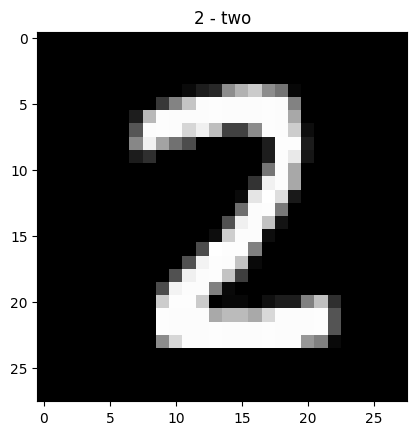

In [33]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_lables[0]])

In [34]:
import pandas as pd
# pd.set_option('display.float_format',lambda x: '%.3f'%x)
# pd.options.display.float_format = '{:.2f}'.format
pred_probs = make_predictions(model= mnist_model,
                             data= test_samples)
# view first two prediction probablities
pred_probs[:2]

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[9.1950e-11, 1.5202e-06, 1.0000e+00, 3.4008e-08, 4.9504e-14, 2.1632e-14,
         3.7700e-14, 4.2789e-09, 1.8015e-06, 6.3871e-11],
        [1.9299e-07, 9.9503e-01, 3.9883e-06, 5.5190e-08, 3.5612e-06, 1.3554e-03,
         3.9629e-04, 2.9952e-06, 3.1831e-03, 2.7266e-05]])

In [35]:
# convert pred probs to labels
pred_classes= pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

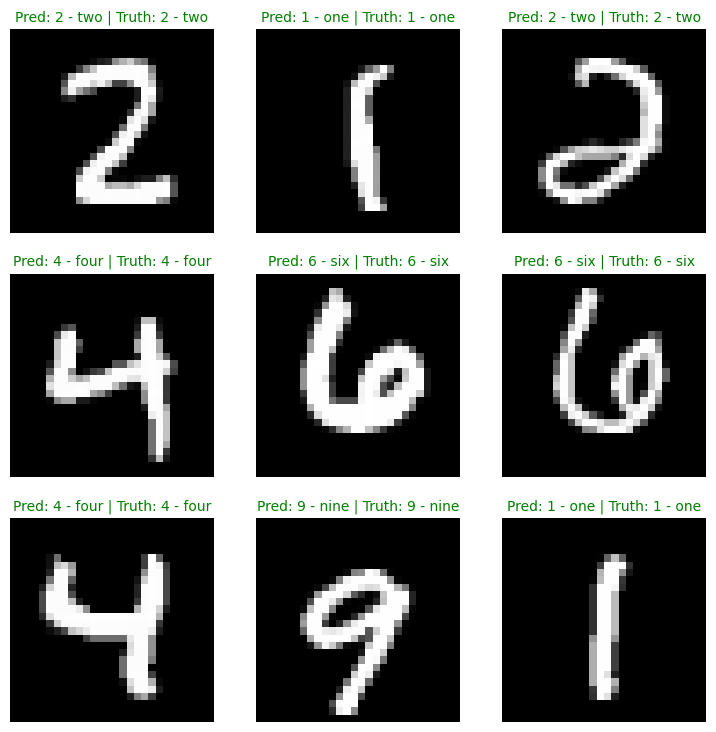

In [36]:
random.seed(42)
# plot predtions
plt.figure(figsize=(9,9))
nrows= 3
ncols=3
for i , sample in enumerate(test_samples):
    #create subplot
    plt.subplot(nrows,ncols, i+1)
    
    # plot the target image
    plt.imshow(sample.squeeze(), cmap= 'gray')
    
    # find pred label in text form
    pred_label= class_names[pred_classes[i]]
    
    #get truth label 
    truth_label = class_names[test_lables[i]]
    
    #create a title for the plot
    title_text= f"Pred: {pred_label} | Truth: {truth_label}"
    
    
    # check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') #green if pred is same as truth
    else:
        plt.title(title_text, fontsize=10, c='r')
    
    plt.axis(False);

    

In [37]:
# import progress bar
from tqdm.auto import tqdm

# make predictions with trained model
y_preds=[]
mnist_model.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc= "making predictions..."):
        #forward pass
        y_logit= mnist_model(X)
        # turn predictions from logits to predictions
        y_pred= torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #put prediction on cpu for evaluation
        y_preds.append(y_pred)

# print(y_preds)
y_pred_tensor= torch.cat(y_preds)
y_pred_tensor[:10]

making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 8, 1, 8, 8, 8, 8])

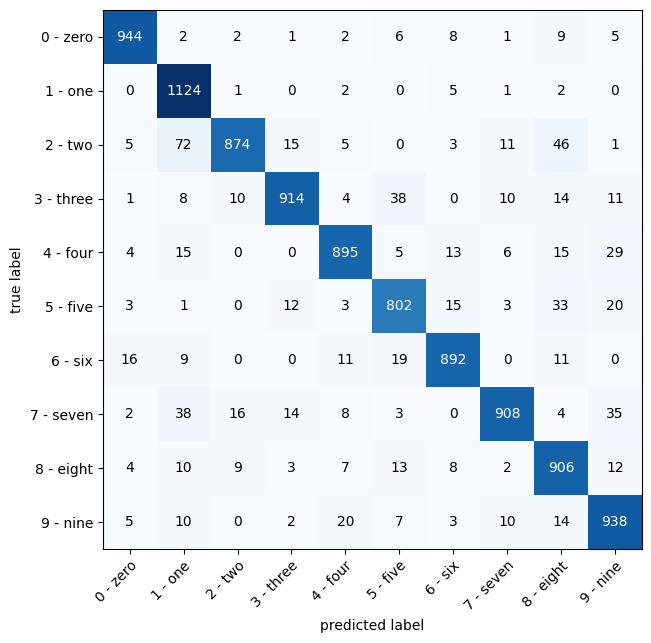

In [38]:
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes= len(class_names))
confmat_tensor= confmat(preds= y_pred_tensor,
                        target = test_data.targets)

# plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10,7))

# predictive system

tensor([1])


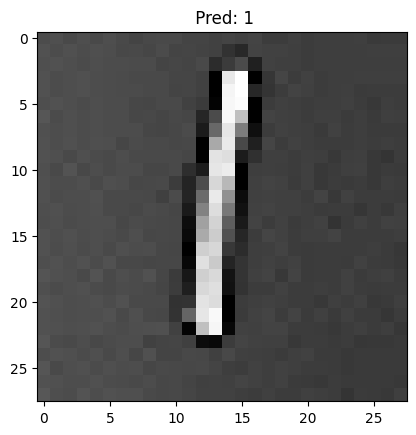

In [39]:
import cv2
import numpy as np


# Load sample image
file = r"/Users/kush/Downloads/WhatsApp Image 2022-11-19 at 9.38.57 PM.jpeg"
test_image = cv2.imread(file)

# Preview sample image
plt.imshow(test_image, cmap='gray')


gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(gray, 50, 50)
plt.imshow(edged, cmap='gray')


# Format Image
img_resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
img_resized = cv2.bitwise_not(img_resized)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img_resized = cv2.filter2D(src=img_resized, ddepth=-1, kernel=kernel)
#img_resized = cv2.Canny(img_resized, 50, 50)

# Preview reformatted image
plt.imshow(img_resized, cmap='gray')

# convert image to tensor
convert_tensor = transforms.ToTensor()
l=convert_tensor(img_resized.squeeze())
l.shape


# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = mnist_model(l.unsqueeze(dim=1))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
print(model_pred_label)

# Plot the image and prediction

# plt.figure()

# plt.imshow(l.squeeze(), cmap="gray")

plt.title(f" Pred: {model_pred_label.item()}") 
# plt.axis(False);
plt.show()

In [40]:
import torchvision
file = r"/Users/kush/Downloads/WhatsApp Image 2022-11-19 at 9.38.57 PM (2).jpeg"
# read custom image
custom_image_uint8= torchvision.io.read_image(str(file)) #io means input output
custom_image_uint8

tensor([[[178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         ...,
         [175, 175, 175,  ..., 202, 202, 202],
         [175, 175, 175,  ..., 202, 202, 202],
         [175, 175, 174,  ..., 202, 202, 202]],

        [[178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         ...,
         [179, 179, 179,  ..., 202, 202, 202],
         [179, 179, 179,  ..., 202, 202, 202],
         [179, 179, 178,  ..., 202, 202, 202]],

        [[178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         ...,
         [180, 180, 180,  ..., 202, 202, 202],
         [180, 180, 180,  ..., 202, 202, 202],
         [180, 180, 179,  ..., 202, 202, 202]]], dtype=torch.uint8)

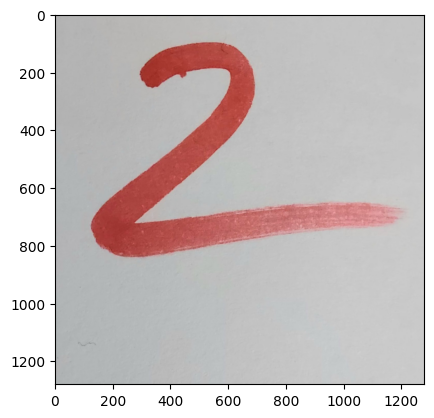

In [41]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [42]:
print('custom image tensor',custom_image_uint8)
print('custom image shape',custom_image_uint8.shape)
print('custom image datatype',custom_image_uint8.dtype)#%%

custom image tensor tensor([[[178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         ...,
         [175, 175, 175,  ..., 202, 202, 202],
         [175, 175, 175,  ..., 202, 202, 202],
         [175, 175, 174,  ..., 202, 202, 202]],

        [[178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         ...,
         [179, 179, 179,  ..., 202, 202, 202],
         [179, 179, 179,  ..., 202, 202, 202],
         [179, 179, 178,  ..., 202, 202, 202]],

        [[178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         [178, 178, 178,  ..., 195, 195, 195],
         ...,
         [180, 180, 180,  ..., 202, 202, 202],
         [180, 180, 180,  ..., 202, 202, 202],
         [180, 180, 179,  ..., 202, 202, 202]]], dtype=torch.uint8)
custom image shape torch.Size([3, 1280, 1280])
custom image datatyp

In [43]:
#load custom image an convert to torch.int32
custom_image = torchvision.io.read_image(str(file)).type(torch.float32)/255
custom_image
    

tensor([[[0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         [0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         [0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         ...,
         [0.6863, 0.6863, 0.6863,  ..., 0.7922, 0.7922, 0.7922],
         [0.6863, 0.6863, 0.6863,  ..., 0.7922, 0.7922, 0.7922],
         [0.6863, 0.6863, 0.6824,  ..., 0.7922, 0.7922, 0.7922]],

        [[0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         [0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         [0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         ...,
         [0.7020, 0.7020, 0.7020,  ..., 0.7922, 0.7922, 0.7922],
         [0.7020, 0.7020, 0.7020,  ..., 0.7922, 0.7922, 0.7922],
         [0.7020, 0.7020, 0.6980,  ..., 0.7922, 0.7922, 0.7922]],

        [[0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         [0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.7647],
         [0.6980, 0.6980, 0.6980,  ..., 0.7647, 0.7647, 0.

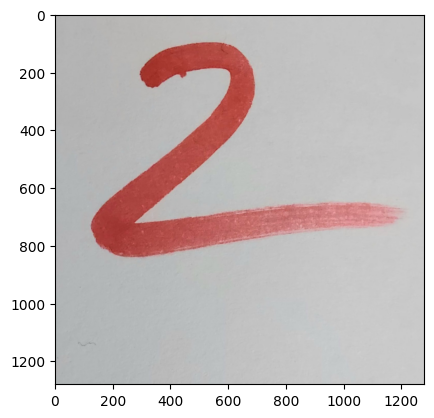

In [44]:
plt.imshow(custom_image.permute(1,2,0))

In [45]:
#resize the image
custom_image_transform= transforms.Compose([transforms.Resize(size=(28,28))])#%%#%%#%%
#transform target image
custom_image_transformed= custom_image_transform(custom_image)
#print out the shape
print('original shape', custom_image.shape)
print('transformed shape',custom_image_transformed.shape)#transform the image

original shape torch.Size([3, 1280, 1280])
transformed shape torch.Size([3, 28, 28])


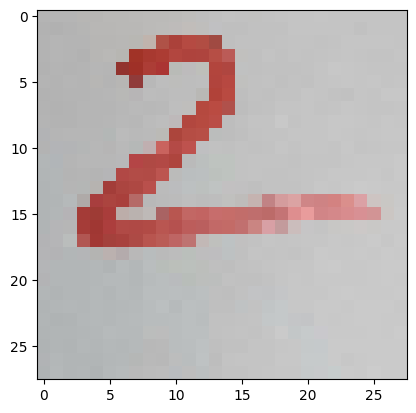

In [46]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [47]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Read the image
k= r"/Users/kush/Downloads/WhatsApp Image 2022-11-19 at 9.38.57 PM (2).jpeg"
img = Image.open(k)

# define a transform to convert the image to grayscale
transform = transforms.Grayscale()

# apply the above transform on the image
img = transform(img)

# dispaly the image
img.show()

# # num of output channels = 1
# print(img.mode)
custom_image_uint8= torchvision.io.read_image(str(k)) #io means input output
custom_image_uint8




# load custom image an convert to torch.int32
custom_image = torchvision.io.read_image(str(file)).type(torch.float32)/255
custom_image




# resize the image
custom_image_transform= transforms.Compose([transforms.Resize(size=(gray,(28,28)))])
#transform target image
custom_image_transformed= custom_image_transform(custom_image)
#print out the shape
print('original shape', custom_image.shape)
print('transformed shape',custom_image_transformed.shape)#transform the image

TypeError: upsample_bilinear2d() received an invalid combination of arguments - got (Tensor, list, bool, NoneType), but expected one of:
 * (Tensor input, tuple of SymInts output_size, bool align_corners, tuple of floats scale_factors)
      didn't match because some of the arguments have invalid types: (Tensor, !list!, bool, !NoneType!)
 * (Tensor input, tuple of SymInts output_size, bool align_corners, float scales_h, float scales_w, *, Tensor out)


In [ ]:
import torchvision
import cv2
file = r"/Users/kush/Downloads/WhatsApp Image 2022-11-19 at 9.38.57 PM (2).jpeg"
# read custom image
custom_image_uint8= torchvision.io.read_image(str(file)) #io means input output
custom_image_uint8




# load custom image an convert to torch.int32
custom_image = torchvision.io.read_image(str(file)).type(torch.float32)/255
custom_image




# resize the image
custom_image_transform= transforms.Compose([transforms.Resize(size=(gray,(28,28)))])#%%#%%#%%#convert custom image to tensor
#transform target image
custom_image_transformed= custom_image_transform(custom_image)
#print out the shape
print('original shape', custom_image.shape)
print('transformed shape',custom_image_transformed.shape)#transform the image


